## VGG network

In [2]:
import tensorflow

In [36]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

In [37]:
vgg = VGG16()
vgg.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
553467904/553467096 [==============================] - 378s 1us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 11

In [56]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [57]:
fashion_mnist = keras.datasets.fashion_mnist
(trainImages, trainLabels), (testImages, testLabels) = fashion_mnist.load_data()

In [58]:
classNames = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [59]:
trainLabels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [60]:
trainImages.shape #(60000, 28, 28)
trainLabels.shape #(60000,)  0~9
testImages.shape #(10000, 28, 28)
testLabels.shape #(10000,) 0~9

(10000,)

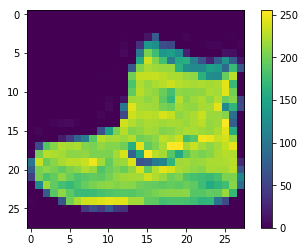

9

In [61]:
plt.figure()
plt.imshow(trainImages[0])
plt.colorbar()
plt.show()
trainLabels[0]

In [62]:
trainImages = trainImages/255.0
testImages = testImages/255.0

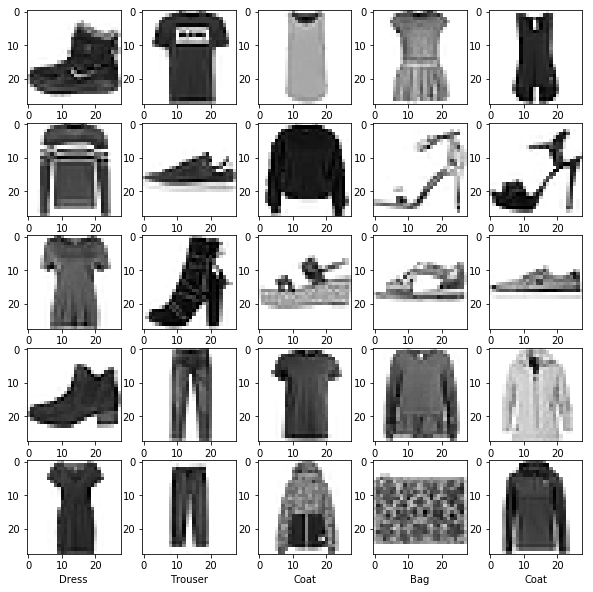

In [63]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(trainImages[i], cmap=plt.cm.binary)
    plt.xlabel(classNames[trainLabels[i]])
plt.show()

In [31]:
#오후 연습문제
"""
예측이미지 / 실제이미지 많이 틀린 이미지 출력
부츠 신발 : 3
티셔츠 신발 : 5
...

정답: 신발, 예측을 잘못한 모든 케이스에 대해 어떤 예측으로 했는지 출력(최대값)
"""

In [38]:
from PIL import Image

In [39]:
img = np.array(Image.open("dog.jpg").resize((224,224)))

In [40]:
yhat = vgg.predict(img.reshape(-1,224,224,3))

In [41]:
labelIdx = np.argmax(yhat)

In [46]:
label = decode_predictions(yhat)
np.shape(label) #(1, 5, 3)
label
print("예상 품종:" , label[0][0][1])
print("확률:", label[0][0][2])

예상 품종: Staffordshire_bullterrier
확률: 0.40970775


In [72]:
#keras.io에 있는 모델 사용
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'dog.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]


Predicted: [('n02099712', 'Labrador_retriever', 0.30204698), ('n03223299', 'doormat', 0.07700446), ('n02093428', 'American_Staffordshire_terrier', 0.071830764)]
